In [1]:
import os, shutil
import time
import datetime
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.callbacks import EarlyStopping
from keras import layers
from keras import models
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import cv2

Using TensorFlow backend.


In [ ]:
https://github.com/arunponnusamy/gender-detection-keras
https://github.com/yu4u/age-gender-estimation

In [17]:
train_dir = 'gender_dataset_face'
test_dir = 'gender_dataset_face_test'

datagen=ImageDataGenerator(rescale=1./255., validation_split=0.25)

train_generator = datagen.flow_from_directory(
        train_dir,
        subset="training",
        batch_size=32,
        seed=8,
        shuffle=True,
        class_mode='categorical',
        target_size=(150,150))

valid_generator = datagen.flow_from_directory(
        train_dir,
        subset="validation",
        batch_size=32,
        seed=8,
        shuffle=True,
        class_mode='categorical',
        target_size=(150,150))

test_datagen=ImageDataGenerator(rescale=1./255)

test_generator=test_datagen.flow_from_directory(
        test_dir,
        batch_size=32,
        seed=8,
        shuffle=False,
        class_mode=None,
        target_size=(150,150))

Found 1634 images belonging to 2 classes.
Found 544 images belonging to 2 classes.
Found 129 images belonging to 1 classes.


In [18]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(2, activation='softmax'))

In [4]:
model.compile(loss='categorical_crossentropy',
             optimizer='Adam',
              metrics=['acc']
             )

# checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
callbacks_list = [checkpoint, es]

t1=datetime.datetime.now()
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=400,
      callbacks=callbacks_list,
      validation_data=valid_generator,
      validation_steps=50)
t2 = datetime.datetime.now()
print(t2-t1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/400
100/100 [==============================] - 20s 195ms/step - loss: 7.9728 - acc: 0.5013 - val_loss: 7.9785 - val_acc: 0.5050

Epoch 00001: val_acc improved from -inf to 0.50500, saving model to weights.best.hdf5
Epoch 2/400
100/100 [==============================] - 14s 135ms/step - loss: 7.9079 - acc: 0.5094 - val_loss: 7.9281 - val_acc: 0.5081

Epoch 00002: val_acc improved from 0.50500 to 0.50813, saving model to weights.best.hdf5
Epoch 3/400
100/100 [==============================] - 14s 136ms/step - loss: 8.0742 - acc: 0.4991 - val_loss: 7.9684 - val_acc: 0.5056

Epoch 00003: val_acc did not improve from 0.50813
Epoch 4/400
100/100 [==============================] - 13s 134ms/step - loss: 7.9129 - acc: 0.5091 - val_loss: 8.0490 - val_acc: 0.5006

Epoch 00004: val_acc did not improve from 0.50813
Epoch 5/400
100/100 [==============================] - 13s 134ms/step - loss: 8.0187 - acc: 0.5025 - val_loss: 7.9382 - val_acc: 

In [5]:
model.save('gender_model_new_5131.h5')

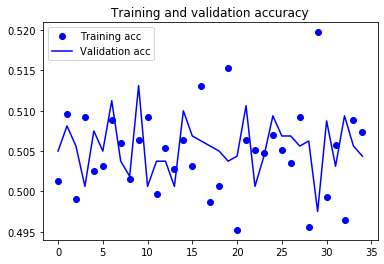

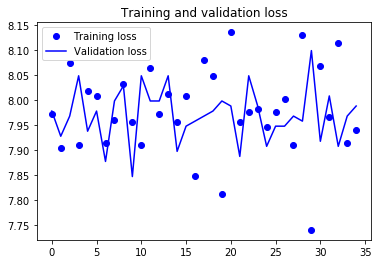

In [6]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# w. vgg

In [22]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))

In [24]:
train_dir = 'gender_dataset_face'
test_dir = 'gender_dataset_face_test'

datagen=ImageDataGenerator(rescale=1./255., validation_split=0.25)

train_generator = datagen.flow_from_directory(
        train_dir,
        subset="training",
        batch_size=32,
        seed=8,
        shuffle=True,
        class_mode='categorical',
        target_size=(150,150))

valid_generator = datagen.flow_from_directory(
        train_dir,
        subset="validation",
        batch_size=32,
        seed=8,
        shuffle=True,
        class_mode='categorical',
        target_size=(150,150))

test_datagen=ImageDataGenerator(rescale=1./255)

test_generator=test_datagen.flow_from_directory(
        test_dir,
        batch_size=32,
        seed=8,
        shuffle=False,
        class_mode=None,
        target_size=(150,150))

model = models.Sequential()
model.add(vgg_model)
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(132, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='Adam',
              metrics=['acc']
             )

# checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
callbacks_list = [checkpoint, es]

t1=datetime.datetime.now()
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=400,
      callbacks=callbacks_list,
      validation_data=valid_generator,
      validation_steps=50)
t2 = datetime.datetime.now()
print(t2-t1)

Found 1634 images belonging to 2 classes.
Found 544 images belonging to 2 classes.
Found 129 images belonging to 1 classes.
Epoch 1/400
100/100 [==============================] - 20s 199ms/step - loss: 7.9767 - acc: 0.4997 - val_loss: 8.1396 - val_acc: 0.4950

Epoch 00001: val_acc improved from -inf to 0.49500, saving model to weights.best.hdf5
Epoch 2/400
100/100 [==============================] - 16s 156ms/step - loss: 8.1850 - acc: 0.4922 - val_loss: 8.1900 - val_acc: 0.4919

Epoch 00002: val_acc did not improve from 0.49500
Epoch 3/400
100/100 [==============================] - 16s 155ms/step - loss: 8.0742 - acc: 0.4991 - val_loss: 8.1497 - val_acc: 0.4944

Epoch 00003: val_acc did not improve from 0.49500
Epoch 4/400
100/100 [==============================] - 16s 155ms/step - loss: 8.2102 - acc: 0.4906 - val_loss: 8.0691 - val_acc: 0.4994

Epoch 00004: val_acc improved from 0.49500 to 0.49938, saving model to weights.best.hdf5
Epoch 5/400
100/100 [==============================] 

100/100 [==============================] - 16s 156ms/step - loss: 8.2102 - acc: 0.4906 - val_loss: 8.1699 - val_acc: 0.4931

Epoch 00043: val_acc did not improve from 0.50313
Epoch 44/400
100/100 [==============================] - 16s 156ms/step - loss: 8.1691 - acc: 0.4932 - val_loss: 8.2102 - val_acc: 0.4906

Epoch 00044: val_acc did not improve from 0.50313
Epoch 45/400
100/100 [==============================] - 16s 156ms/step - loss: 8.2245 - acc: 0.4897 - val_loss: 8.1396 - val_acc: 0.4950

Epoch 00045: val_acc did not improve from 0.50313
Epoch 46/400
100/100 [==============================] - 16s 156ms/step - loss: 8.0145 - acc: 0.5028 - val_loss: 8.1799 - val_acc: 0.4925

Epoch 00046: val_acc did not improve from 0.50313
Epoch 47/400
100/100 [==============================] - 16s 156ms/step - loss: 8.2102 - acc: 0.4906 - val_loss: 8.1497 - val_acc: 0.4944

Epoch 00047: val_acc did not improve from 0.50313
Epoch 48/400
100/100 [==============================] - 16s 156ms/step - 

In [25]:
model.save('gender_vgg_5031.h5')

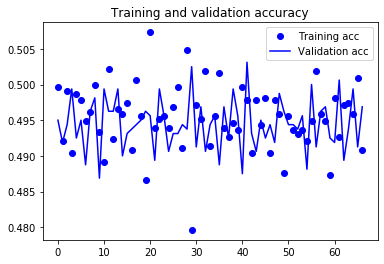

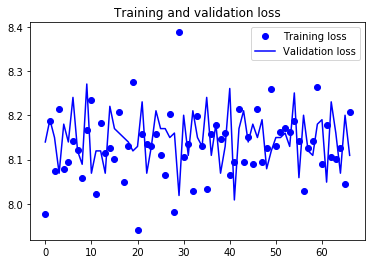

In [26]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [7]:
train_generator.class_indices

{'Female': 0, 'Male': 1}

In [8]:
pred = model.predict_generator(test_generator, steps=len(test_generator), verbose=1)
print('Generated {} predictions'.format(len(pred)))

5/5 [==============================] - 1s 131ms/step
Generated 129 predictions


In [10]:
def predictoneimage_cnn(model, path):
#     img = load_img(path, target_size=(150, 150))
    img = load_img(path, target_size=(150,150))
    plt.imshow(img)
    img = img_to_array(img)
    img = img/255
    img = np.expand_dims(img, axis=0)
    predict = model.predict(img)
    
    gender = ["Female","Male"]
    gender_prob = np.max(predict)
    labels = gender[predict.argmax()]
    
#     predicted_class_indices=np.argmax(predict,axis=1)
#     labels = (train_generator.class_indices)
#     labels = dict((v,k) for k,v in labels.items())
#     predictions = [labels[k] for k in predicted_class_indices]
    return predict, print(labels)

    

Male


(array([[0., 1.]], dtype=float32), None)

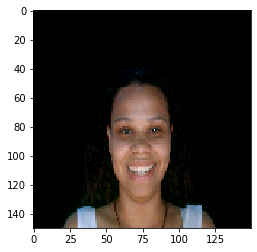

In [11]:
predictoneimage_cnn(model, 'data/happy/s002-01_img.tif')

Male


(array([[0., 1.]], dtype=float32), None)

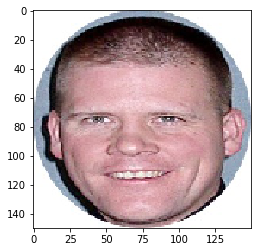

In [12]:
predictoneimage_cnn(model, 'wilmabainbridge/Images/Aaron Booth_5_oval.jpg')

Male


(array([[0., 1.]], dtype=float32), None)

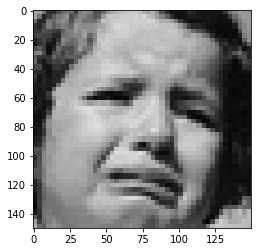

In [13]:
predictoneimage_cnn(model, 'fer2013/Test/Pred/PublicTest_5425294.jpg')

Male


(array([[0., 1.]], dtype=float32), None)

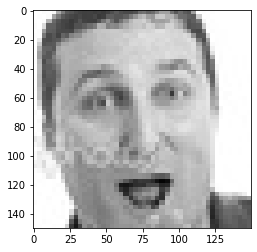

In [14]:
predictoneimage_cnn(model, 'fer2013/Test/Pred/PublicTest_8843901.jpg')

Male


(array([[0., 1.]], dtype=float32), None)

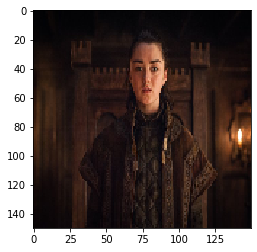

In [15]:
predictoneimage_cnn(model, 'arya.jpg')

In [33]:
model = load_model('age-gender-weights.28-3.73.hdf5')

In [34]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 16)   432         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 64, 64, 16)   64          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 64, 64, 16)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [44]:
def predictoneimage_cnn(model, path):
#     img = load_img(path, target_size=(150, 150))
    img = load_img(path, target_size=(64,64))
    plt.imshow(img)
    img = img_to_array(img)
    img = img/255
    img = np.expand_dims(img, axis=0)
    predict = model.predict(img)
    
#     gender = ["Female","Male"]
#     gender_prob = np.max(predict)
#     labels = gender[predict.argmax()]
    
    predicted_class_indices=np.argmax(predict,axis=1)
    labels = (train_generator.class_indices)
    labels = dict((v,k) for k,v in labels.items())
    predictions = [labels[k] for k in predicted_class_indices]
    return predict, print(labels)

    

ValueError: could not broadcast input array from shape (2) into shape (1)

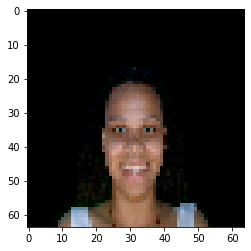

In [45]:
predictoneimage_cnn(model, 'data/happy/s002-01_img.tif')

In [39]:
test_datagen=ImageDataGenerator(rescale=1./255)

test_generator=test_datagen.flow_from_directory(
        test_dir,
        batch_size=32,
        seed=8,
        shuffle=False,
        class_mode=None,
        target_size=(64,64))

Found 129 images belonging to 1 classes.


In [40]:
pred = model.predict_generator(test_generator, steps=len(test_generator), verbose=1)
print('Generated {} predictions'.format(len(pred)))

5/5 [==============================] - 0s 85ms/step
Generated 2 predictions


ValueError: arrays must all be same length